Домашнее задание №1 по предмету NLP

In [2]:
#устанавливаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [19]:
#загружаем данные
df = pd.read_csv("C:/Users/Petroo/Desktop/train.csv")
df.head()

,Unnamed: 0,Text,Sentiment
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,1,advice Talk to your neighbours family to excha...,Positive
2,2,Coronavirus Australia: Woolworths to give elde...,Positive
3,3,My food stock is not the only one which is emp...,Positive
4,4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
#Удалим ненужные колонки и строки с пропусками 
df_cleaned = df.drop(columns=['Unnamed: 0']).dropna(subset=['Sentiment'])

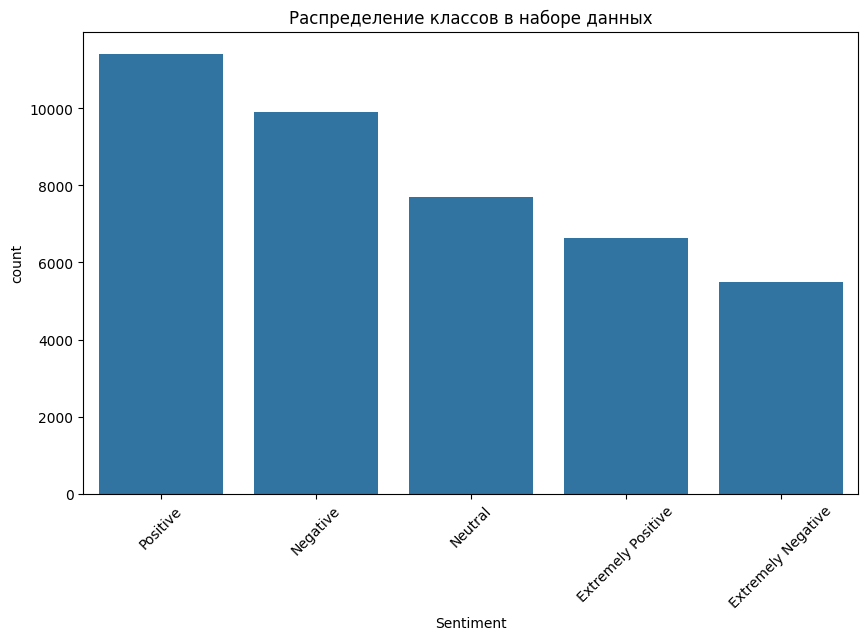

In [20]:
#Визуализация распределения классов
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Sentiment', order=df_cleaned['Sentiment'].value_counts().index)
plt.title('Распределение классов в наборе данных')
plt.xticks(rotation=45)
plt.show()

#Было обнаружено пять категорий тональности, больше всего классов в категории «Positive», 
#меньше всего — в «Extremely Negative»

In [9]:
#Добавим колонку с длиной текстов
df_cleaned['text_length'] = df_cleaned['Text'].apply(len)

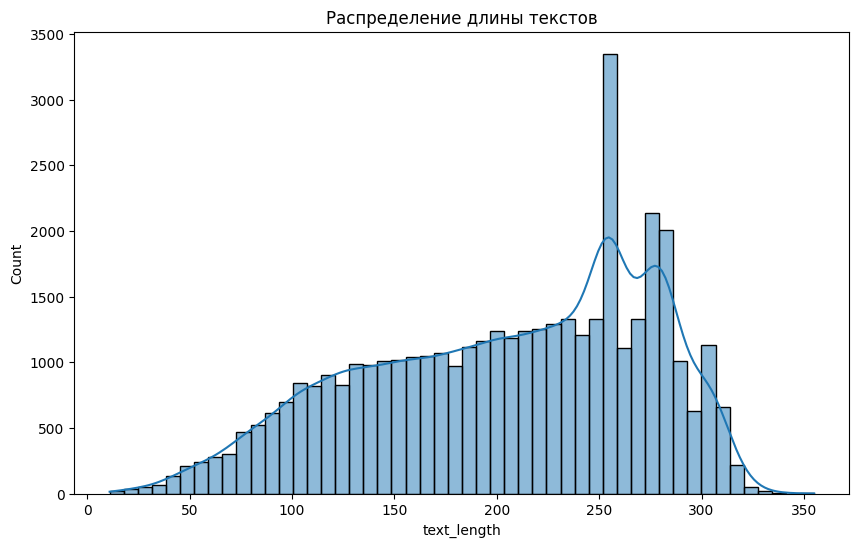

In [10]:
#Визуализация распределения длины текстов
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['text_length'], kde=True, bins=50)
plt.title('Распределение длины текстов')
plt.show()

#длинна текствов разная, но большинство короткие=средние

In [11]:
#создадим пример словарей для эвристики исходя из положительного и отрицательного
positive_words = ['good', 'great', 'fantastic', 'positive', 'love', 'excellent']
negative_words = ['bad', 'terrible', 'hate', 'negative', 'awful', 'worst']


In [12]:
#Функция для эвр. предсказания
def heuristic_sentiment(text):
    positive_count = sum([1 for word in text.split() if word.lower() in positive_words])
    negative_count = sum([1 for word in text.split() if word.lower() in negative_words])
    
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'
    

In [13]:
#Применяем функцию у к данным
df_cleaned['heuristic_prediction'] = df_cleaned['Text'].apply(heuristic_sentiment)

#посмотрим Accuracy
heuristic_accuracy = accuracy_score(df_cleaned['Sentiment'], df_cleaned['heuristic_prediction'])
print(f'Accuracy эвристического подхода: {heuristic_accuracy:.4f}')

Accuracy эвристического подхода: 0.2032


In [14]:
#разделяем данные на выборки
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Text'], df_cleaned['Sentiment'], test_size=0.2, random_state=42)


In [15]:
#Векторизация текста с использованием TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


#используем TF-IDF для учета важности слов и контекста

In [16]:
#Обучаем модель лог. регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [17]:
#Предсказания на тестовой выборке
y_pred = model.predict(X_test_tfidf)

In [18]:
#Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

#точность получилась выше чем у эвристического метода, за счёт учета более сложных взаимосвязей

Accuracy: 0.5705
F1 Score: 0.5708


Итоги:

EDA:
визуализировали распределение классов и проанализировали распределение длины текстов

Эвристика:

попытались предсказать тональности на основе списков положительных и отрицательных слов
рассчитали точность эвристики

Векторизация и обучение модели:

преобразовали тексты в числовые векторы с использованием TF-IDF
обучили логистическую регрессию на этих векторах
Оценили модель по метрикам Accuracy и F1-Score

Вывод:

ML-модели могут обучаться на большом количестве данных и учитывать более сложные закономерности